# LSTM for Timeseries - Forecasting Electrocardiogram Activity

## Step 1 - Collect Data
The data used is ECG from `wmtsa` package that contains 2048 data.

Loading required package: wmtsa



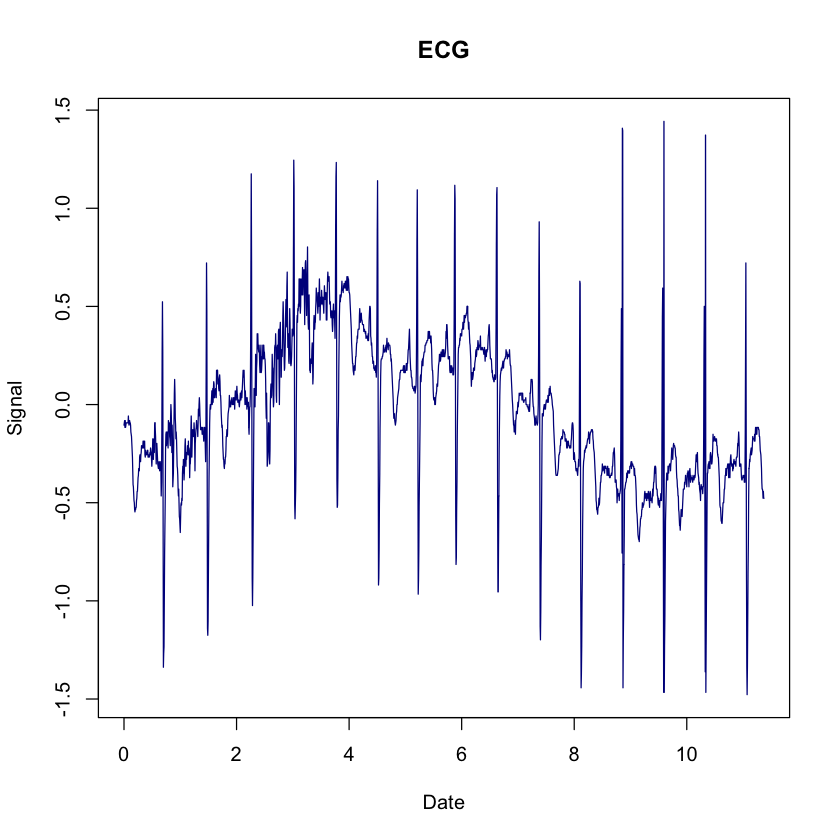

In [1]:
# import data
require("wmtsa") 
plot(ecg, xlab="Date", ylab="Signal", col="darkblue")

In [2]:
length(ecg)

[1] 2048

## Step 2 - Explore and Prepare Data

In [3]:
# check datatype of ecg
class(ecg)

[1] "signalSeries"
attr(,"package")
[1] ".GlobalEnv"

In [4]:
# first, convert the data into numeric
data <- as.numeric(ecg)

# check
head(data)

[1] -0.104773 -0.093136 -0.081500 -0.116409 -0.081500 -0.116409

### 2.1 Create Lagged Attributes
We create lagged attributes as input: x1,x2,x3,x4 and make the original data as target variable.

In [5]:
# import required library
require(quantmod)

# convert data into zoo
data <- as.zoo(data)

# create lagged attributes using quantmod package
x1 <- Lag(data, k=1)
x2 <- Lag(data, k=2)
x3 <- Lag(data, k=3)
x4 <- Lag(data, k=4)
    
# combine lagged and actual
x <- cbind(x1, x2, x3, x4, data)

# check
head(x)

Loading required package: quantmod

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Version 0.4-0 included new data defaults. See ?getSymbols.



      Lag.1     Lag.2     Lag.3     Lag.4      data
1        NA        NA        NA        NA -0.104773
2 -0.104773        NA        NA        NA -0.093136
3 -0.093136 -0.104773        NA        NA -0.081500
4 -0.081500 -0.093136 -0.104773        NA -0.116409
5 -0.116409 -0.081500 -0.093136 -0.104773 -0.081500
6 -0.081500 -0.116409 -0.081500 -0.093136 -0.116409

### 2.2 Remove Missing Values
The combined data has some missing values, so lets remove it.

In [6]:
# remove first 1st-4th row
x <- x[-(1:4),]

# check
head(x)

       Lag.1     Lag.2     Lag.3     Lag.4      data
5  -0.116409 -0.081500 -0.093136 -0.104773 -0.081500
6  -0.081500 -0.116409 -0.081500 -0.093136 -0.116409
7  -0.116409 -0.081500 -0.116409 -0.081500 -0.104773
8  -0.104773 -0.116409 -0.081500 -0.116409 -0.093136
9  -0.093136 -0.104773 -0.116409 -0.081500 -0.093136
10 -0.093136 -0.093136 -0.104773 -0.116409 -0.093136

### 2.3 Scale Data
Scale data using custom `range_data` function

In [7]:
# convert data into matrix
x <- data.matrix(x)

# scale data
range_data <- function(x) {
  (x-min(x))/(max(x)-min(x))
}
min_data <- min(x)
max_data <- max(x)
x <- range_data(x)

# check
head(x)

,Lag.1,Lag.2,Lag.3,Lag.4,data
5,0.4661355,0.4780877,0.4741037,0.4701194,0.4780877
6,0.4780877,0.4661355,0.4780877,0.4741037,0.4661355
7,0.4661355,0.4780877,0.4661355,0.4780877,0.4701194
8,0.4701194,0.4661355,0.4780877,0.4661355,0.4741037
9,0.4741037,0.4701194,0.4661355,0.4780877,0.4741037
10,0.4741037,0.4741037,0.4701194,0.4661355,0.4741037


### 2.4 Split Data into Train Dataset
We will use the first 1950 observations for the training sample.

In [8]:
# split columns
x1 <- as.matrix(x[,1]) 
x2 <- as.matrix(x[,2]) 
x3 <- as.matrix(x[,3]) 
x4 <- as.matrix(x[,4]) 
y <- as.matrix(x[,5]) 

# check
head(x1)

5,0.4661355
6,0.4780877
7,0.4661355
8,0.4701194
9,0.4741037
10,0.4741037


In [9]:
# determine train data
n_train <- 1950

# split data inti train set
y_train <- as.matrix(y[1:n_train])
x1_train <- as.matrix(t(x1[1:n_train,]))
x2_train <- as.matrix(t(x2[1:n_train,]))
x3_train <- as.matrix(t(x3[1:n_train,]))
x4_train <- as.matrix(t(x4[1:n_train,]))

# check
head(y_train)

0.4780877
0.4661355
0.4701194
0.4741037
0.4741037
0.4741037


## Step 3 - Train Model
In this case, we will use LSTM model from rnn package

In [10]:
x_train <- array(c(x1_train, x2_train, x3_train, x4_train), dim=c(dim(x1_train), 4))

# check dimension
dim(x_train)

[1]    1 1950    4

In [12]:
# import required library
require(rnn)

# specify model architecture
set.seed(2018)
model1 <- trainr(
  Y = t(y_train), 
  X = x_train,
  learningrate = 0.05,
  hidden_dim = 3,
  numepochs = 300,
  network_type = 'lstm',
  sigmoid = "tanh"
  )

Trained epoch: 1 - Learning rate: 0.05

Epoch error: 199.293638683587

Trained epoch: 2 - Learning rate: 0.05

Epoch error: 200.178064764721

Trained epoch: 3 - Learning rate: 0.05

Epoch error: 201.81692274459

Trained epoch: 4 - Learning rate: 0.05

Epoch error: 203.111121048199

Trained epoch: 5 - Learning rate: 0.05

Epoch error: 203.776603140746

Trained epoch: 6 - Learning rate: 0.05

Epoch error: 204.009003809019

Trained epoch: 7 - Learning rate: 0.05

Epoch error: 203.997184416224

Trained epoch: 8 - Learning rate: 0.05

Epoch error: 203.851625085675

Trained epoch: 9 - Learning rate: 0.05

Epoch error: 203.632040053539

Trained epoch: 10 - Learning rate: 0.05

Epoch error: 203.371906175582

Trained epoch: 11 - Learning rate: 0.05

Epoch error: 203.088228900551

Trained epoch: 12 - Learning rate: 0.05

Epoch error: 202.790495381104

Trained epoch: 13 - Learning rate: 0.05

Epoch error: 202.484374482446

Trained epoch: 14 - Learning rate: 0.05

Epoch error: 202.173203487195

Tr

Trained epoch: 115 - Learning rate: 0.05

Epoch error: 178.507000140782

Trained epoch: 116 - Learning rate: 0.05

Epoch error: 178.384698978414

Trained epoch: 117 - Learning rate: 0.05

Epoch error: 178.263995038198

Trained epoch: 118 - Learning rate: 0.05

Epoch error: 178.144691227446

Trained epoch: 119 - Learning rate: 0.05

Epoch error: 178.026761049075

Trained epoch: 120 - Learning rate: 0.05

Epoch error: 177.910304652722

Trained epoch: 121 - Learning rate: 0.05

Epoch error: 177.795254293187

Trained epoch: 122 - Learning rate: 0.05

Epoch error: 177.681529678591

Trained epoch: 123 - Learning rate: 0.05

Epoch error: 177.569357041311

Trained epoch: 124 - Learning rate: 0.05

Epoch error: 177.459181787389

Trained epoch: 125 - Learning rate: 0.05

Epoch error: 177.350265338199

Trained epoch: 126 - Learning rate: 0.05

Epoch error: 177.242723179288

Trained epoch: 127 - Learning rate: 0.05

Epoch error: 177.1364526612

Trained epoch: 128 - Learning rate: 0.05

Epoch error

Epoch error: 171.169541638752

Trained epoch: 228 - Learning rate: 0.05

Epoch error: 171.140863683842

Trained epoch: 229 - Learning rate: 0.05

Epoch error: 171.112592992703

Trained epoch: 230 - Learning rate: 0.05

Epoch error: 171.084777019846

Trained epoch: 231 - Learning rate: 0.05

Epoch error: 171.057656229525

Trained epoch: 232 - Learning rate: 0.05

Epoch error: 171.030937819785

Trained epoch: 233 - Learning rate: 0.05

Epoch error: 171.004621487347

Trained epoch: 234 - Learning rate: 0.05

Epoch error: 170.978707072009

Trained epoch: 235 - Learning rate: 0.05

Epoch error: 170.953194560651

Trained epoch: 236 - Learning rate: 0.05

Epoch error: 170.928084091518

Trained epoch: 237 - Learning rate: 0.05

Epoch error: 170.903402974979

Trained epoch: 238 - Learning rate: 0.05

Epoch error: 170.879198175725

Trained epoch: 239 - Learning rate: 0.05

Epoch error: 170.855396377325

Trained epoch: 240 - Learning rate: 0.05

Epoch error: 170.831998385218

Trained epoch: 241 -

## Step 4 – Evaluate Model 

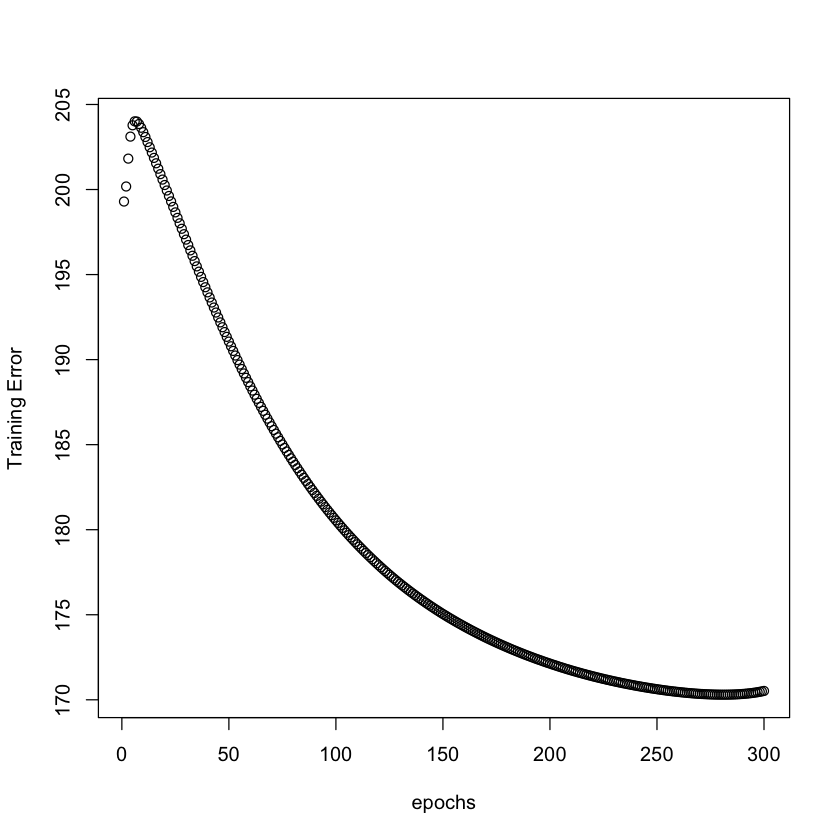

In [14]:
# get error from epoch
error_1 <- t(model1$error)
rownames(error_1) <- 1:nrow(error_1)
colnames(error_1) <- "error"

# plot it
plot(error_1, ylab="Training Error", xlab="epochs")

### 4.1 Get Predicted Values
Obtain model predictions using `predictr` function.

In [16]:
pred1_train <- t(predictr(model1, x_train))

head(pred1_train)

0.4773836
0.4671603
0.4627087
0.4628359
0.4600787
0.4630043


### 4.2 Assess Performance
Evaluate performance using **correlation coefficient** and **root mean squared error**.

In [19]:
# import required library
require(Metrics)

# rmse
rmse_result <- rmse(y_train, pred1_train)
# cor
cor_result <- cor(y_train , pred1_train)

# check result
print(rmse_result)
print(cor_result)

[1] 0.1145936
          [,1]
[1,] 0.7005439


### 4.3 Plot Predictions as a Time Series

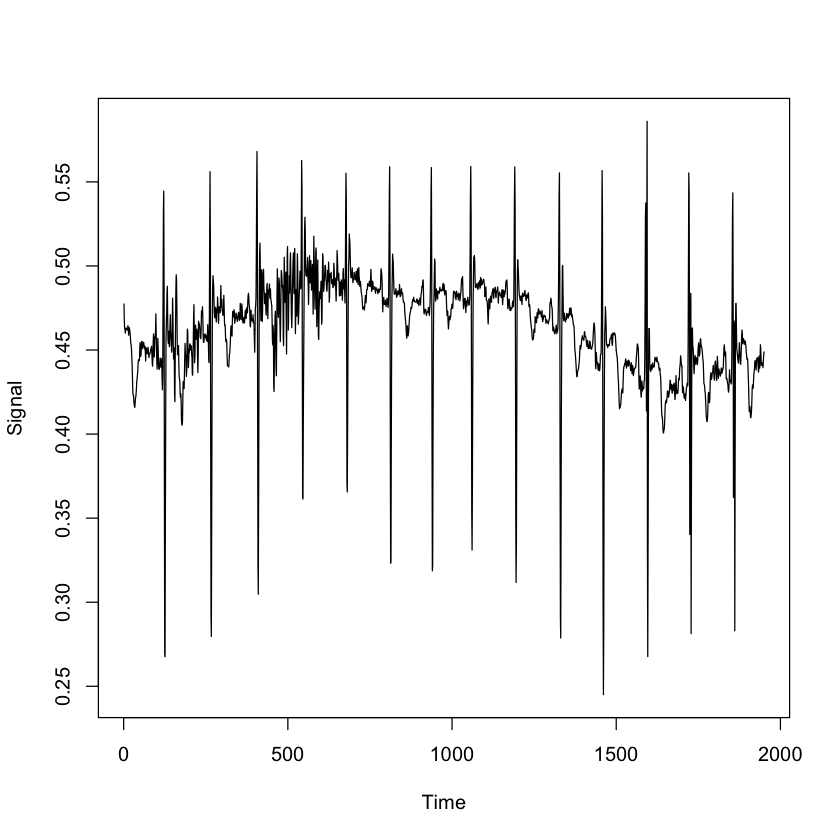

In [20]:
plot(as.ts(pred1_train), ylab="Signal")

## Step 5 – Assess Test Set Performance
After training the model, let's see the model's performance using Test Dataset.

In [22]:
# split data into test set
x1_test <- as.matrix(t(x1[(n_train+1):nrow(x1),]))
x2_test <- as.matrix(t(x2[(n_train+1):nrow(x2),])) 
x3_test <- as.matrix(t(x3[(n_train+1):nrow(x3),])) 
x4_test <- as.matrix(t(x4[(n_train+1):nrow(x4),])) 
y_test <- as.matrix(y[(n_train+1):nrow(x4)])

# check
head(y_test)

0.4063744
0.4063744
0.4023904
0.3984065
0.4103587
0.4143426


In [23]:
x_test <- array(c(
    x1_test,
    x2_test,
    x3_test,
    x4_test), dim = c(dim(x1_test),4)
   ) 

# check
dim(x_test)

[1]  1 94  4

In [25]:
# predict test data
pred1_test <- t(predictr(model1, x_test))

### 5.1 Unscaling Data

In [28]:
# create custom function to unscale data
unscale_data <- function(x, max_x, min_x) { 
    x * (max_x - min_x) + min_x
}

In [29]:
# unscale prediction result
pred1_actual <- unscale_data(pred1_test, max_data, min_data)
pred1_actual <- exp(pred1_actual)
pred1_actual <- ts(matrix(pred1_actual), end=c(2016,7), frequency=12)

# unscale targeted result
y_actual <- unscale_data(y_test, max_data, min_data)
y_actual <- exp(y_actual)
y_actual <- ts(matrix(y_actual), end=c(2016,7), frequency=12)

### 5.2 Visual Check

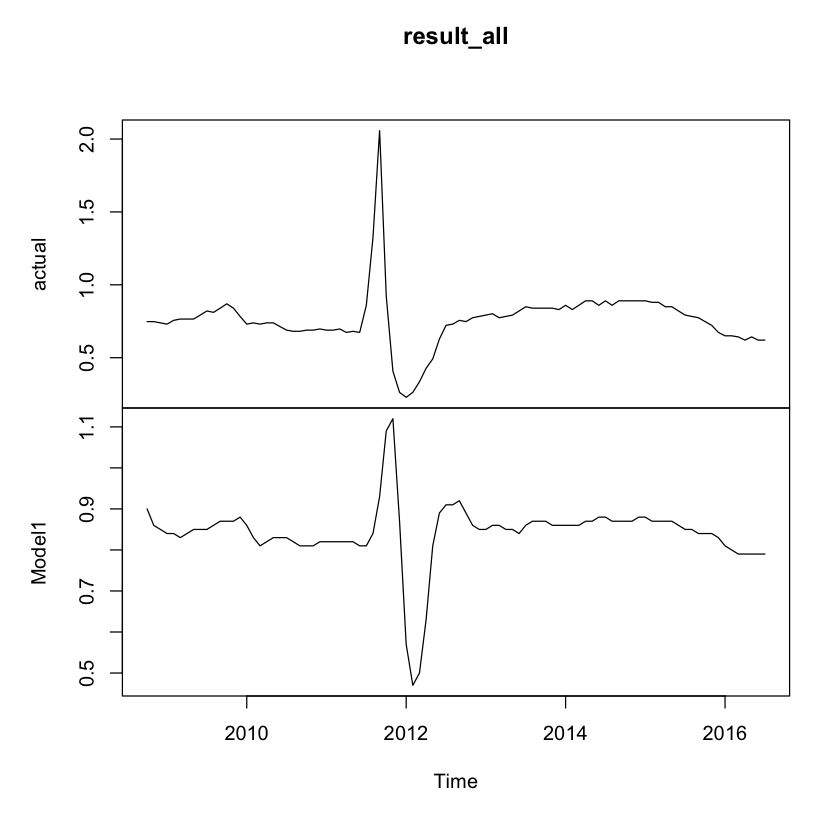

In [30]:
result_all <- cbind(y_actual, round(pred1_actual, 2))
colnames(result_all) <- c("actual", "Model1")

# plot result
plot(result_all)